In [5]:
# Data Preprocessing, Analysis, and Visualization

## 1. Load the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv'
data = pd.read_csv(url)

# Display column names and the first few rows of the DataFrame
print("Column Names:", data.columns)
print("First few rows of the dataset:")
print(data.head())


Column Names: Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')
First few rows of the dataset:
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [6]:
##DATA PROCESSING

# Strip any whitespace from column names
data.columns = data.columns.str.strip()

# Confirm column names after stripping whitespace
print("Column Names after stripping whitespace:", data.columns)

# Preprocessing: Replace "Height" values with random numbers between 150 and 180
data['Height'] = np.random.randint(150, 181, size=len(data))


Column Names after stripping whitespace: Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')


In [12]:
### 3 DATA ANALYSIS

# 3.1 Distribution of employees across each team

team_distribution = data['Team'].value_counts()
team_percentage = team_distribution / len(data) * 100

#3.2 # Segregate employees based on their positions

position_distribution = data.groupby('Position').size()

#3.3 Identify the predominant age group

bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)
age_group_distribution = data['age_group'].value_counts()

#3.4 Highest salary expenditure by team
team_salary = data.groupby('Team')['Salary'].sum()

# Highest salary expenditure by position
position_salary = data.groupby('Position')['Salary'].sum()

#3.5# Correlation between age and salary

correlation = data['Age'].corr(data['Salary'])
print(f"Correlation between age and salary: {correlation:.2f}")








Correlation between age and salary: 0.21


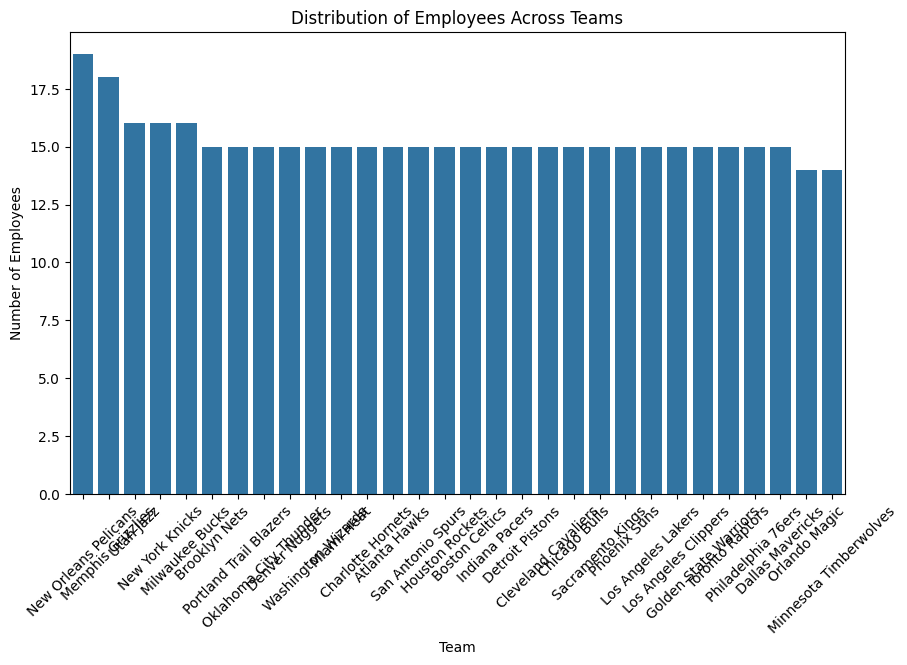

In [13]:
### DATA VISUALISATION

# 4.1 Bar chart for team distribution

plt.figure(figsize=(10, 6))
sns.barplot(x=team_distribution.index, y=team_distribution.values)
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


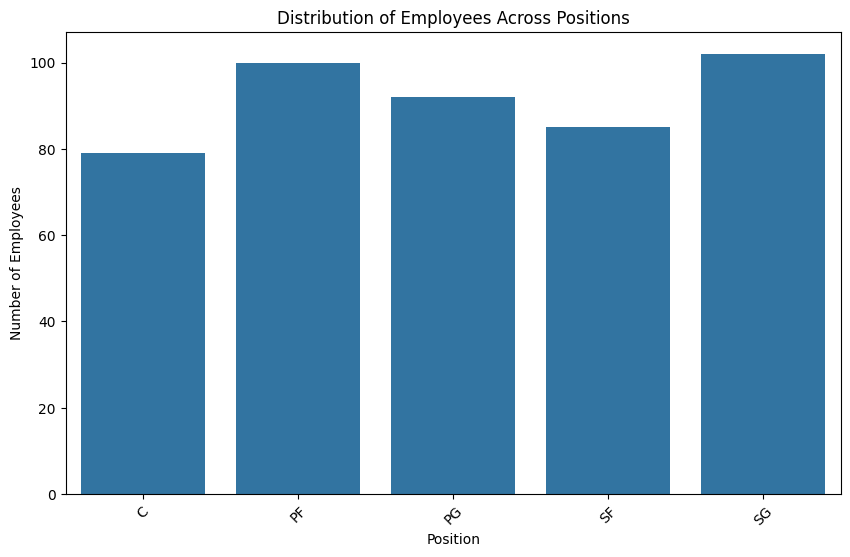

In [14]:
#4.2 # Bar chart for position distribution

plt.figure(figsize=(10, 6))
sns.barplot(x=position_distribution.index, y=position_distribution.values)
plt.title('Distribution of Employees Across Positions')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


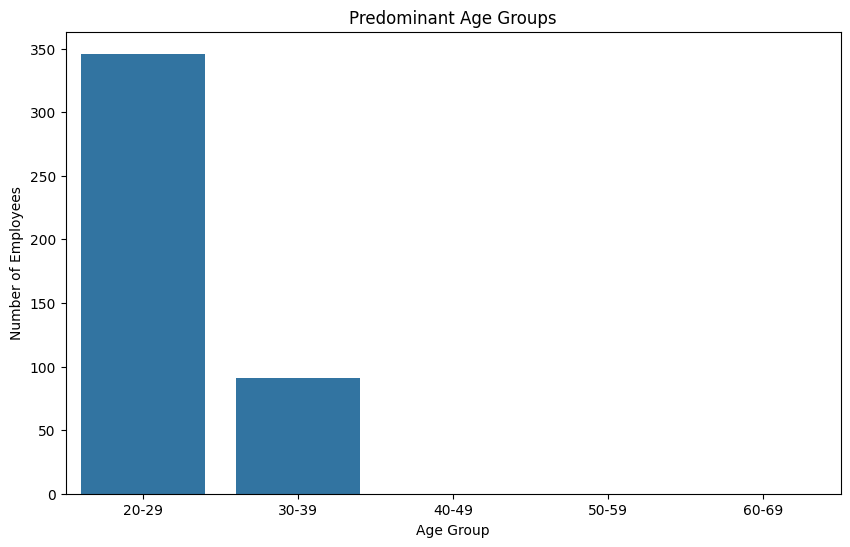

In [16]:
#4.3 Bar chart for age group distribution

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values)
plt.title('Predominant Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()



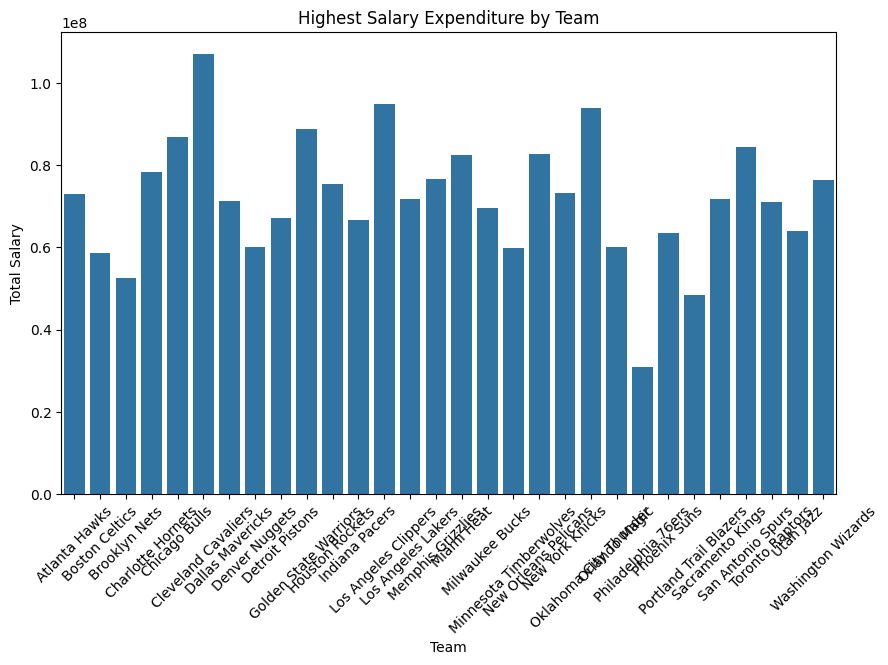

In [17]:
#4.4 # Bar chart for highest salary expenditure by team

plt.figure(figsize=(10, 6))
sns.barplot(x=team_salary.index, y=team_salary.values)
plt.title('Highest Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.show()


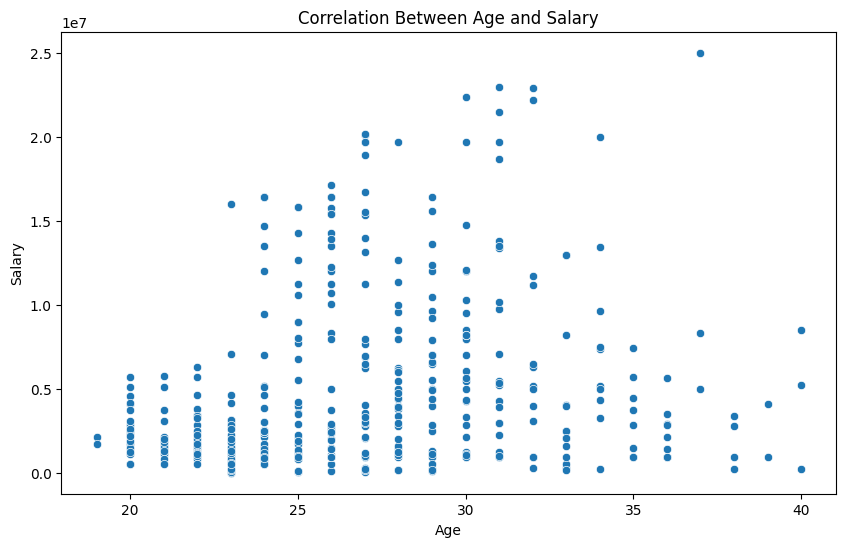

In [18]:
#4.5 Scatter plot for age and salary correlation

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=data)
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()
